In [2]:
# load environment variables
from dotenv import load_dotenv
import os
load_dotenv()

True

# 🏡 California Housing Dataset Documentation

## 📚 Overview

The **California Housing dataset** is a classic machine learning dataset derived from the 1990 U.S. Census. It provides aggregated demographic and housing information at the **block group level** across the state of California. The dataset is frequently used in regression and exploratory data analysis tasks, particularly in predicting **median house values** from neighborhood features.

---

## 📍 What is a Block Group?

A **block group** is a geographical unit used by the U.S. Census Bureau. It is:
- Smaller than a ZIP code or census tract,
- Larger than a city block,
- Typically includes **600 to 3,000 people**.

> 📌 **Each row in the dataset represents one block group**, not an individual house.

All features in the dataset are **aggregated** across households within that block group. That means statistics such as median income, average rooms, and average occupancy reflect **block-level summaries**, not individual household-level data.

---

## 📦 Dataset Contents

The dataset includes **8 input features** and **1 target variable**:

### 🎯 Target Variable

| Feature       | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| **MedHouseVal** | **Median house value** for households within the block group (in \$100,000s). This is the variable most commonly used as the prediction target. |

> Example: A value of `2.45` means \$245,000.

---

### 📊 Features

| Feature        | Type     | Description |
|----------------|----------|-------------|
| **MedInc**     | float64  | **Median income** of households in the block group, measured in **tens of thousands of dollars**. E.g., `3.5` means \$35,000. |
| **HouseAge**   | float64  | **Median age** of the housing units in the block group (in years). Gives a sense of development era. |
| **AveRooms**   | float64  | **Average number of rooms per household** in the block group. Total rooms divided by total households. |
| **AveBedrms**  | float64  | **Average number of bedrooms per household** in the block group. |
| **Population** | float64  | **Total population** living in the block group. |
| **AveOccup**   | float64  | **Average number of occupants per household** in the block group (i.e., population divided by number of households). |
| **Latitude**   | float64  | **Geographical latitude** of the block group center. Used for spatial modeling or geovisualization. |
| **Longitude**  | float64  | **Geographical longitude** of the block group center. |

---

## 🧠 Important Notes

- **The dataset does not contain individual house-level data**. All values are aggregated.
- `Latitude` and `Longitude` represent the **centroid of the block group**, not specific home locations.
- `AveRooms`, `AveBedrms`, and `AveOccup` are **averaged values** across all households in that group.
- The target, `MedHouseVal`, is capped at \$500,000 in the original census, which may introduce a ceiling effect in modeling.

---

## 💡 Typical Use Cases

- **Regression**: Predict `MedHouseVal` using demographic and housing features.
- **Classification**: Convert house values into categories (Low, Medium, High) for classification tasks.
- **Clustering**: Discover neighborhood patterns using unsupervised learning.
- **Feature Engineering**: Create new features such as:
  - Population density
  - Ratio of bedrooms to rooms
  - Proximity to coast or urban centers (using `Latitude`/`Longitude`)


In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.to_csv('../data/california_housing.csv', index=False)

In [6]:
import os
import mlflow

MLFLOW_USERNAME = os.getenv('MLFLOW_TRACKING_USERNAME')
MLFLOW_PASSWORD = os.getenv('MLFLOW_TRACKING_PASSWORD')
MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("CaliforniaHousing")
mlflow.start_run(run_name="EDA")

<ActiveRun: >

## Display and log dataset metadata

In [7]:
# Log basic info
mlflow.log_params({
    "dataset_name": "CaliforniaHousing",
    "no_of_cols": df.shape[1],
    "no_of_rows": df.shape[0],
    "columns": ','.join(df.columns.tolist()),
    "numerical_columns_count": df.select_dtypes(include='number').shape[1],
    "missing_values_total": int(df.isnull().sum().sum())
})


## Generate & display summaries

In [8]:
## Descriptive statistics
stats_df = df.describe()
print("\n📈 Descriptive Statistics:")
stats_df



📈 Descriptive Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
## Missing values
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'missing_values']
print("\n❗ Missing Values:")
missing_df


❗ Missing Values:


,column,missing_values
0,MedInc,0
1,HouseAge,0
2,AveRooms,0
3,AveBedrms,0
4,Population,0
5,AveOccup,0
6,Latitude,0
7,Longitude,0
8,MedHouseVal,0


In [10]:
## Dtypes
dtypes_df = df.dtypes.reset_index()
dtypes_df.columns = ['column', 'dtype']
print("\n🧪 Column Data Types:")
dtypes_df


🧪 Column Data Types:


,column,dtype
0,MedInc,float64
1,HouseAge,float64
2,AveRooms,float64
3,AveBedrms,float64
4,Population,float64
5,AveOccup,float64
6,Latitude,float64
7,Longitude,float64
8,MedHouseVal,float64


In [11]:
# === Setup ===
OUTPUT_DIR = "eda_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

sample_df = df.sample(50, random_state=42)

# === Save and Log CSVs ===
stats_df.to_csv(f"{OUTPUT_DIR}/data_statistics.csv")
missing_df.to_csv(f"{OUTPUT_DIR}/missing_values.csv", index=False)
dtypes_df.to_csv(f"{OUTPUT_DIR}/dtypes.csv", index=False)
sample_df.to_csv(f"{OUTPUT_DIR}/data_sample.csv", index=False)

mlflow.log_artifact(f"{OUTPUT_DIR}/data_statistics.csv")
mlflow.log_artifact(f"{OUTPUT_DIR}/missing_values.csv")
mlflow.log_artifact(f"{OUTPUT_DIR}/dtypes.csv")
mlflow.log_artifact(f"{OUTPUT_DIR}/data_sample.csv")

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

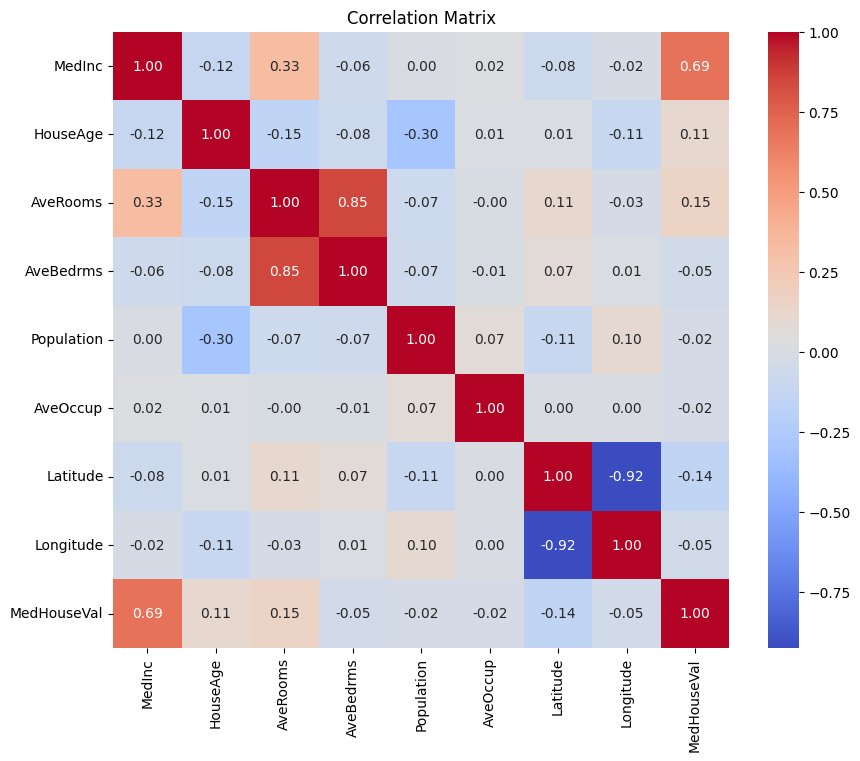

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
heatmap_path = os.path.join(OUTPUT_DIR, "correlation_heatmap.png")
plt.savefig(heatmap_path)
mlflow.log_artifact(heatmap_path, artifact_path="eda_visuals")
plt.show()

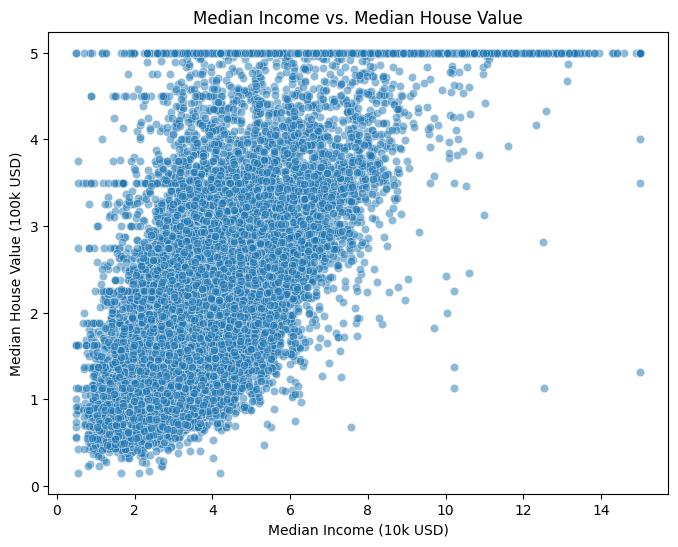

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MedInc", y=data.target, alpha=0.5)
plt.title("Median Income vs. Median House Value")
plt.xlabel("Median Income (10k USD)")
plt.ylabel("Median House Value (100k USD)")
scatter_path = os.path.join(OUTPUT_DIR, "scatter_income_vs_value.png")
plt.savefig(scatter_path)
mlflow.log_artifact(scatter_path, artifact_path="eda_visuals")
plt.show()

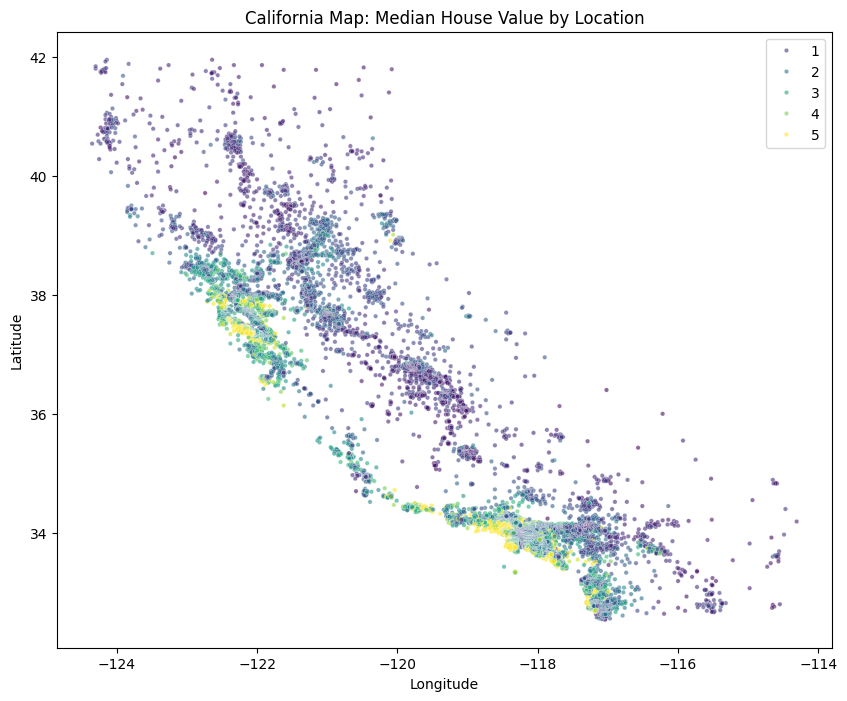

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue=data.target, palette="viridis", s=10, alpha=0.6)
plt.title("California Map: Median House Value by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
geo_path = os.path.join(OUTPUT_DIR, "geo_scatter_value.png")
plt.savefig(geo_path)
mlflow.log_artifact(geo_path, artifact_path="eda_visuals")
plt.show()

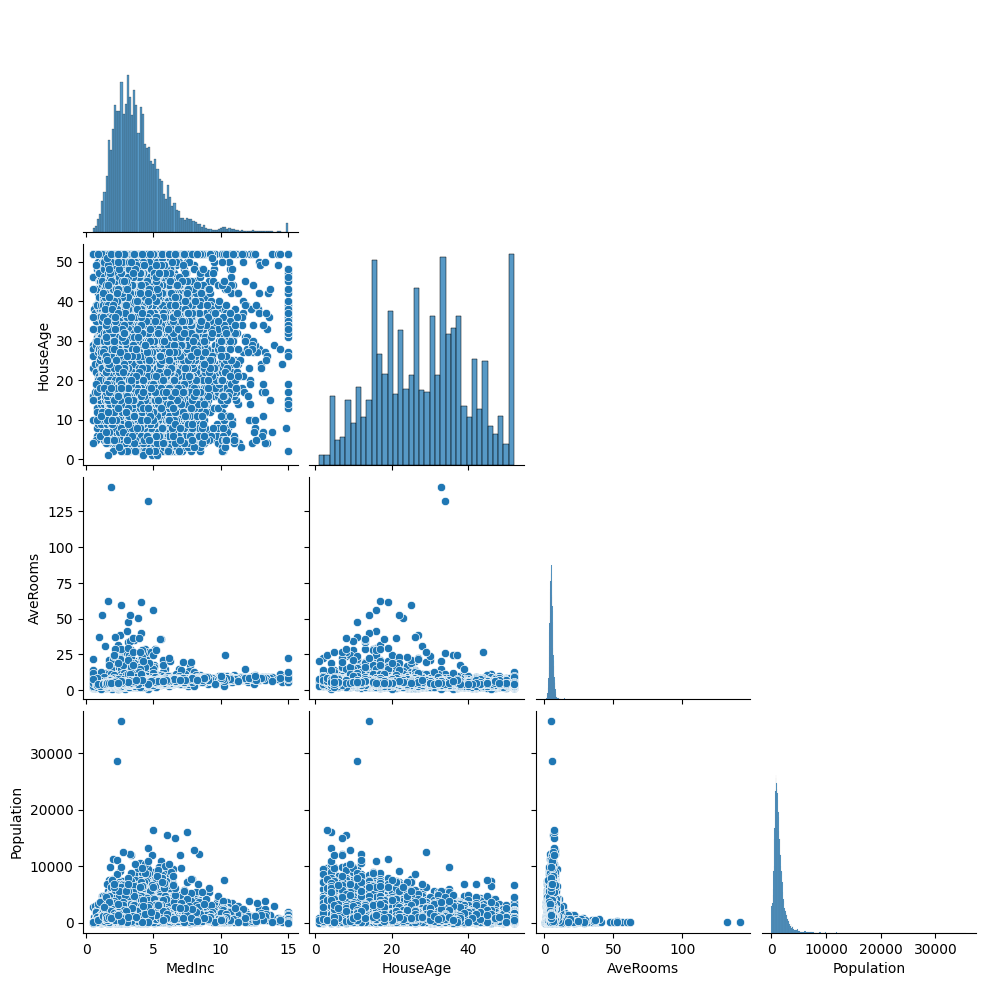

In [16]:
# Optional: only if you're okay with a larger plot
top_features = ["MedInc", "HouseAge", "AveRooms", "Population"]
sns.pairplot(df[top_features], corner=True)
pairplot_path = os.path.join(OUTPUT_DIR, "pairplot_top_features.png")
plt.savefig(pairplot_path)
mlflow.log_artifact(pairplot_path, artifact_path="eda_visuals")
plt.show()

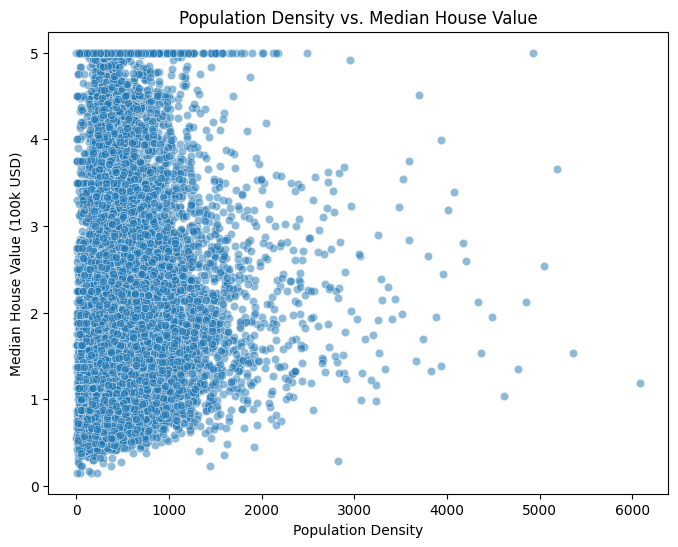

In [17]:
# Create a new column
df["PopDensity"] = df["Population"] / df["AveOccup"]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PopDensity", y=data.target, data=df, alpha=0.5)
plt.title("Population Density vs. Median House Value")
plt.xlabel("Population Density")
plt.ylabel("Median House Value (100k USD)")
popden_path = os.path.join(OUTPUT_DIR, "pop_density_vs_value.png")
plt.savefig(popden_path)
mlflow.log_artifact(popden_path, artifact_path="eda_visuals")
plt.show()

In [18]:
mlflow.set_tag("stage", "Advanced EDA")
mlflow.set_tag("eda_type", "visual exploration")
mlflow.set_tag("visuals", "heatmap, scatter, geo, pairplot")

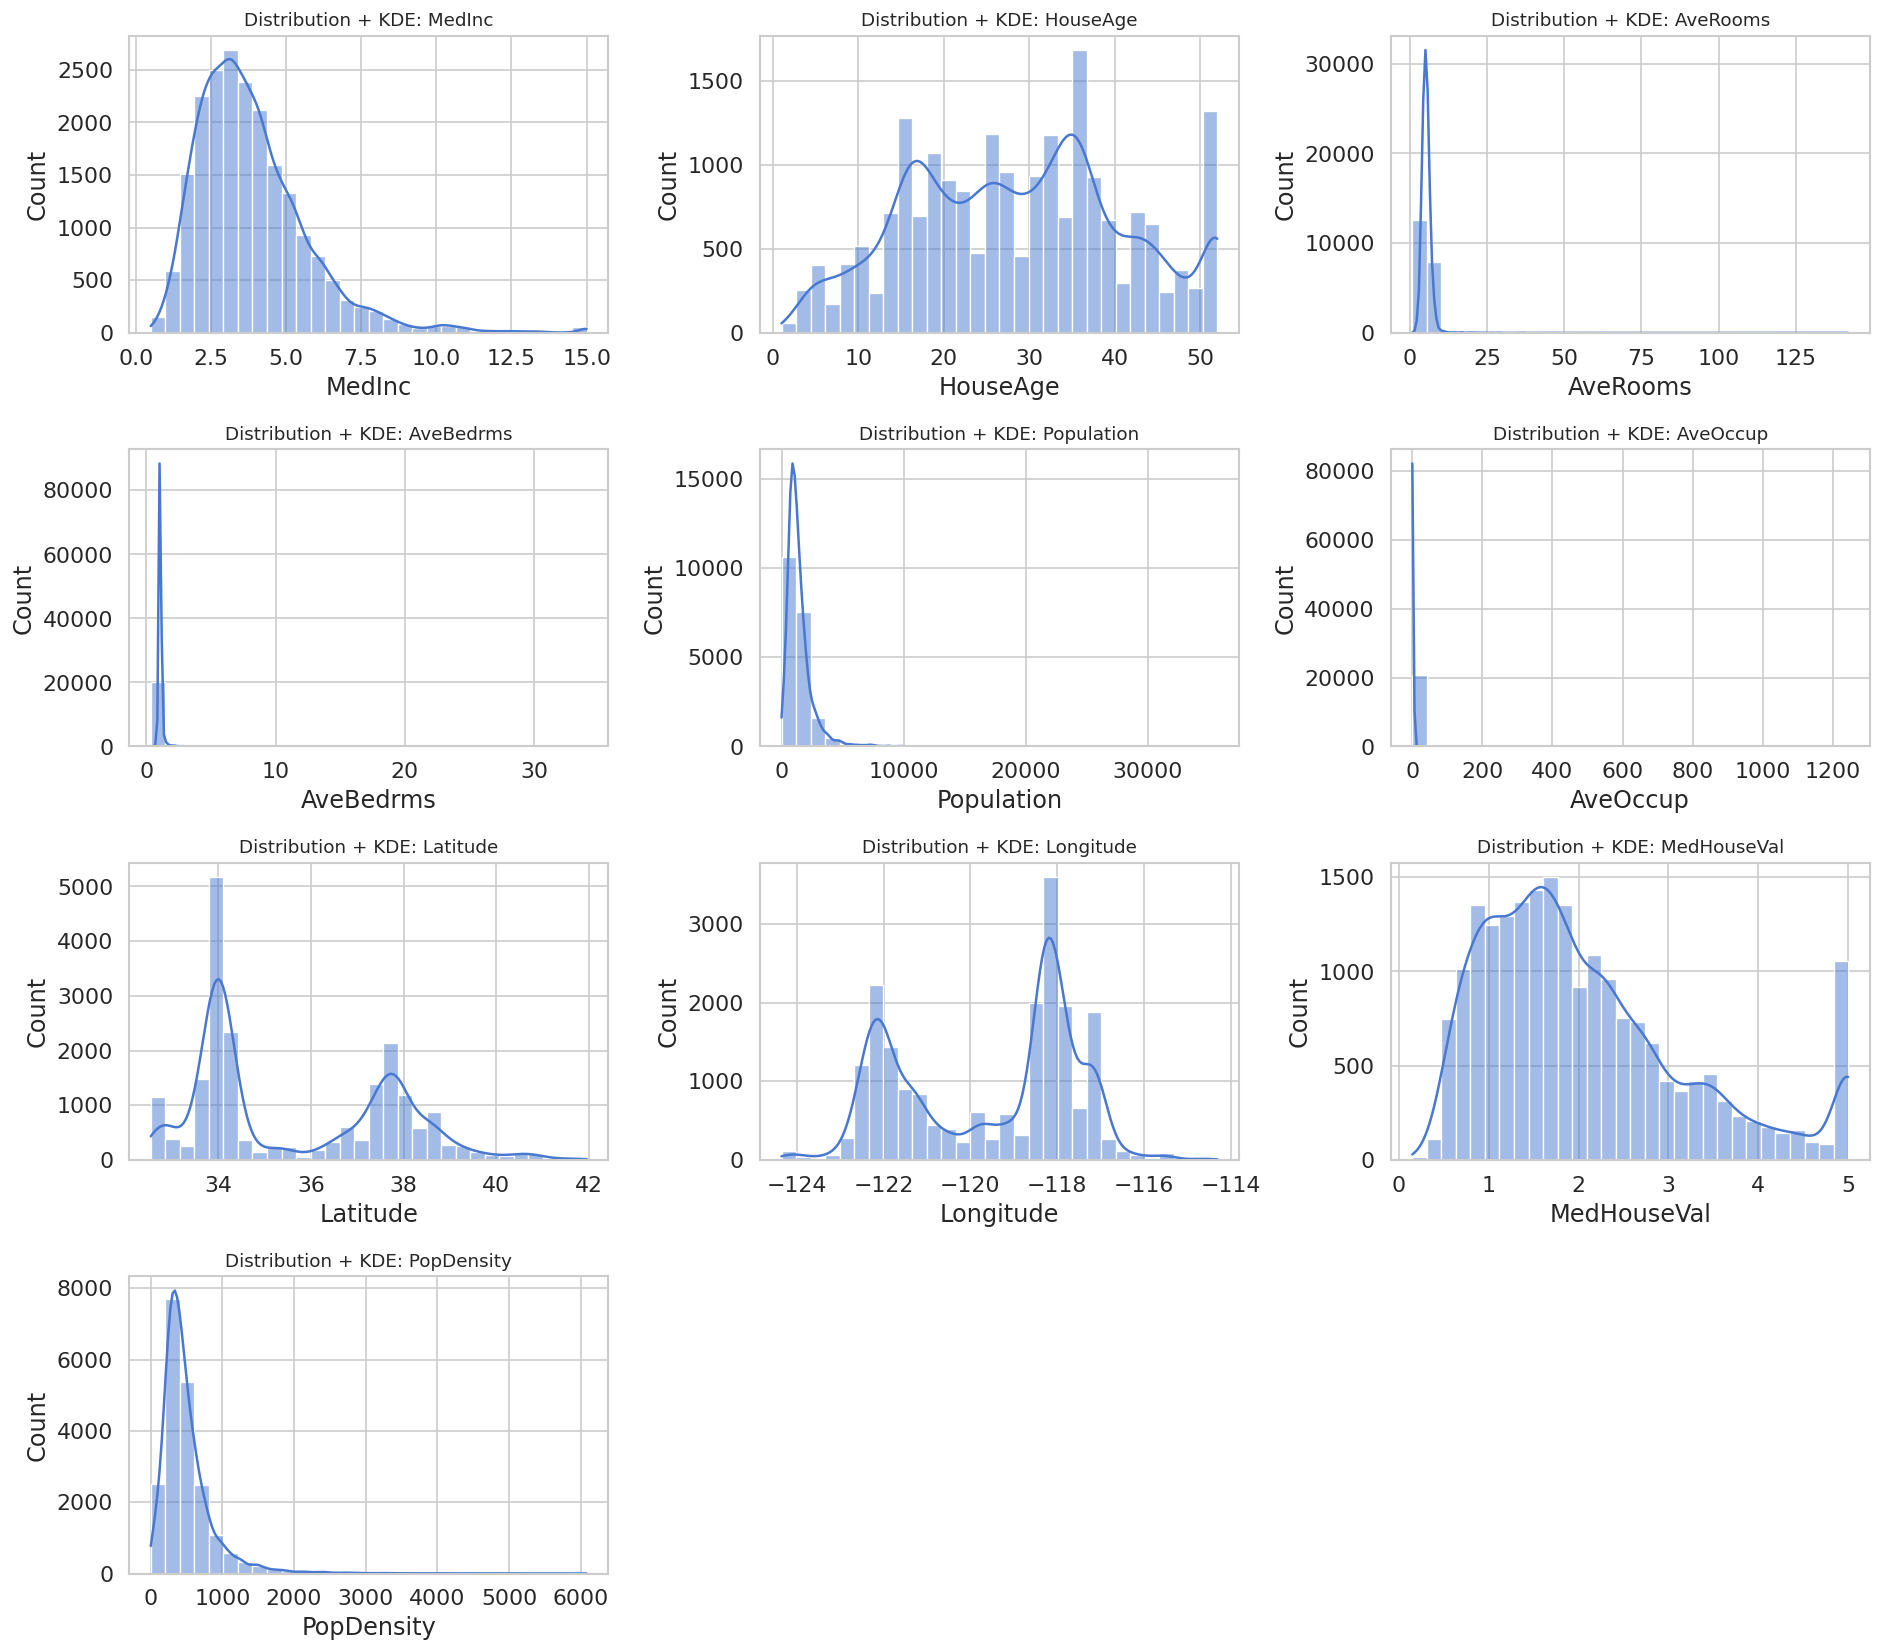

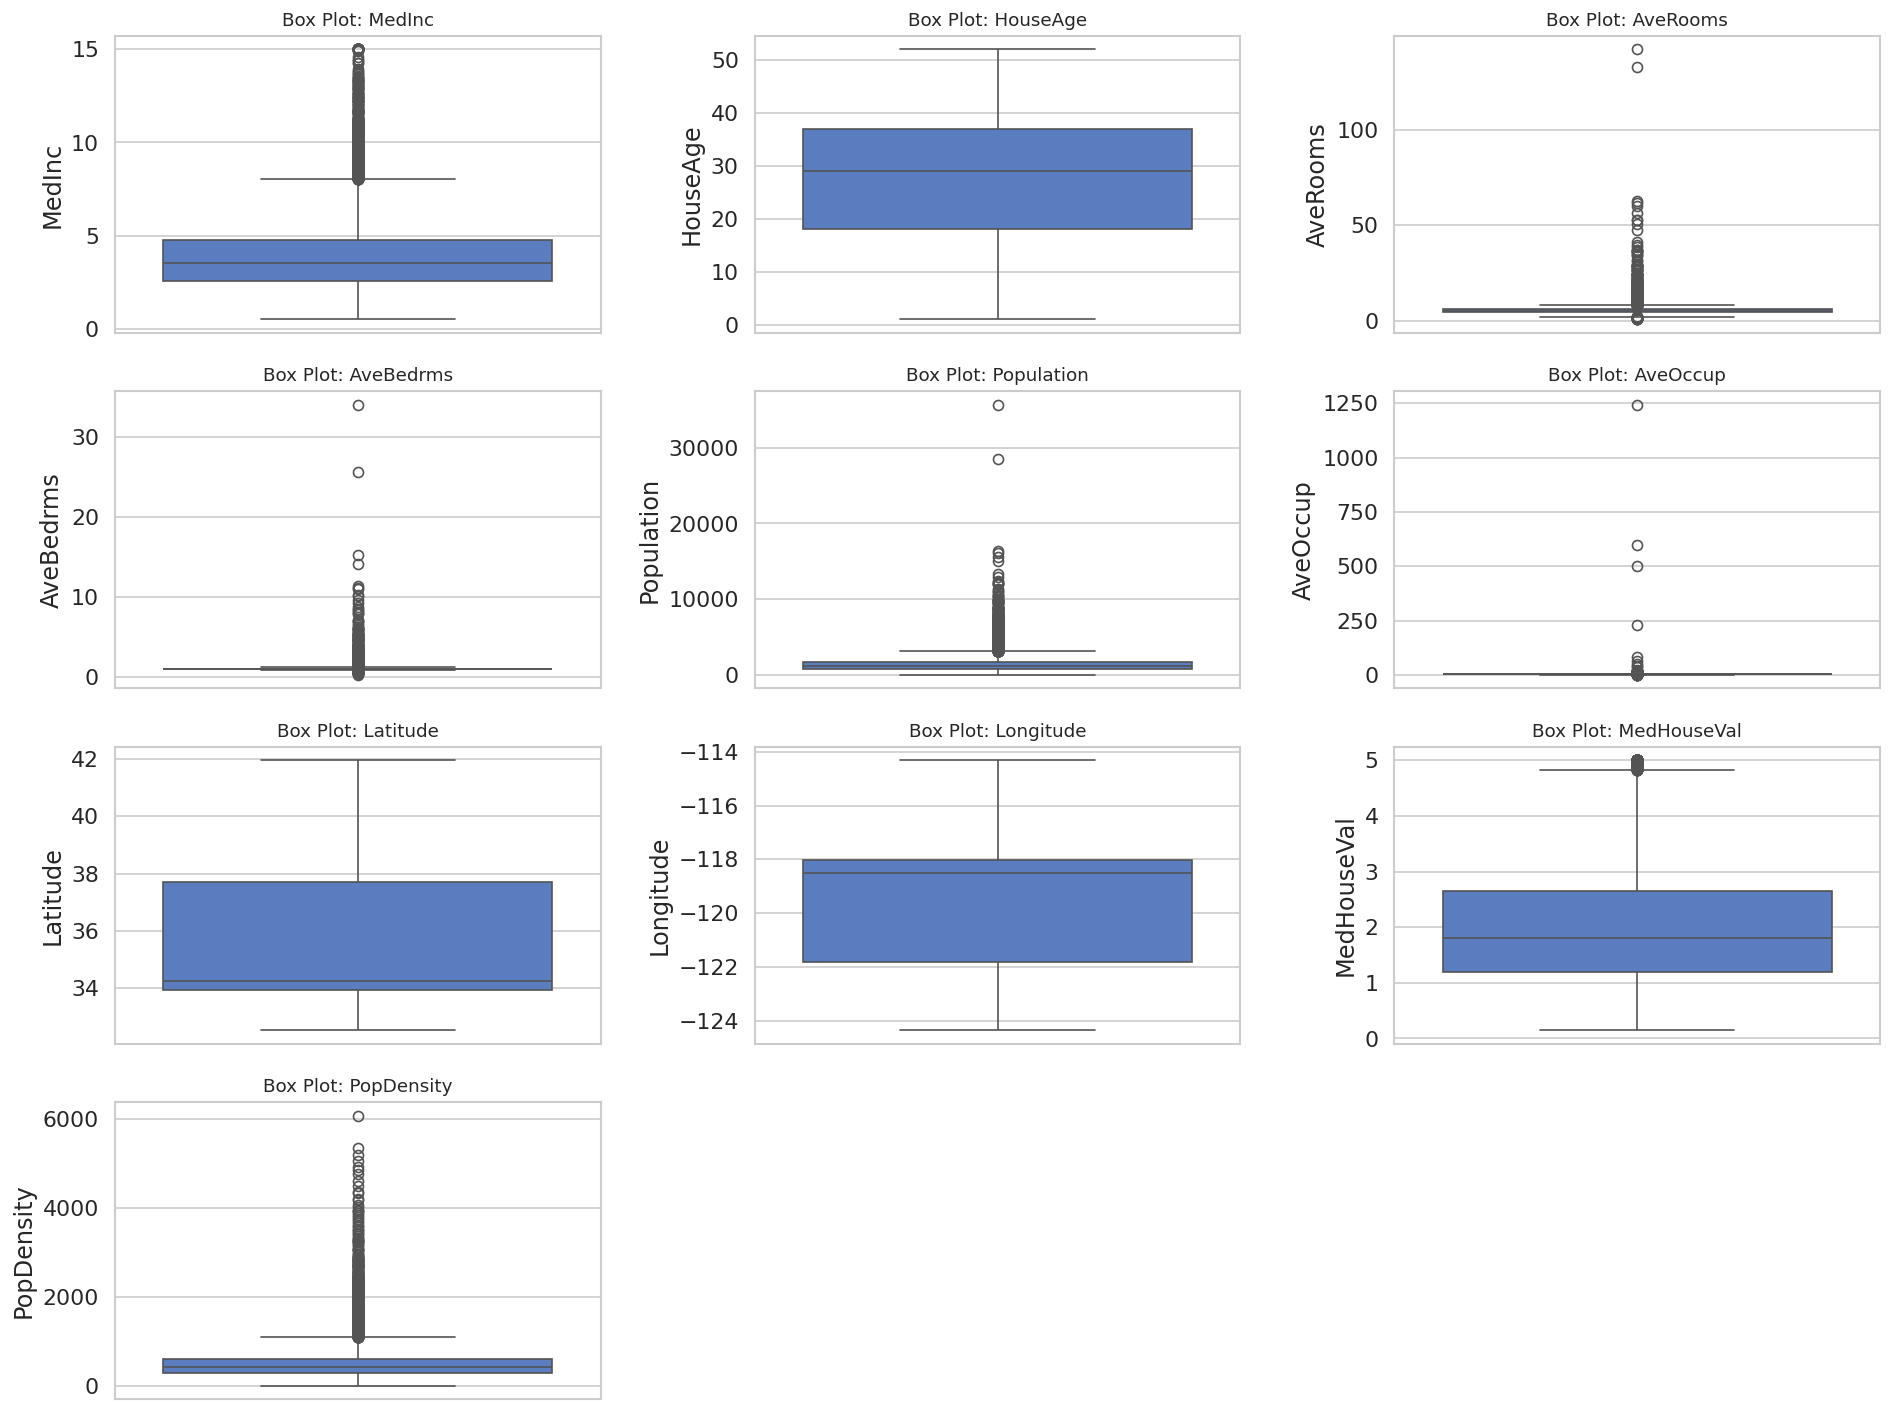

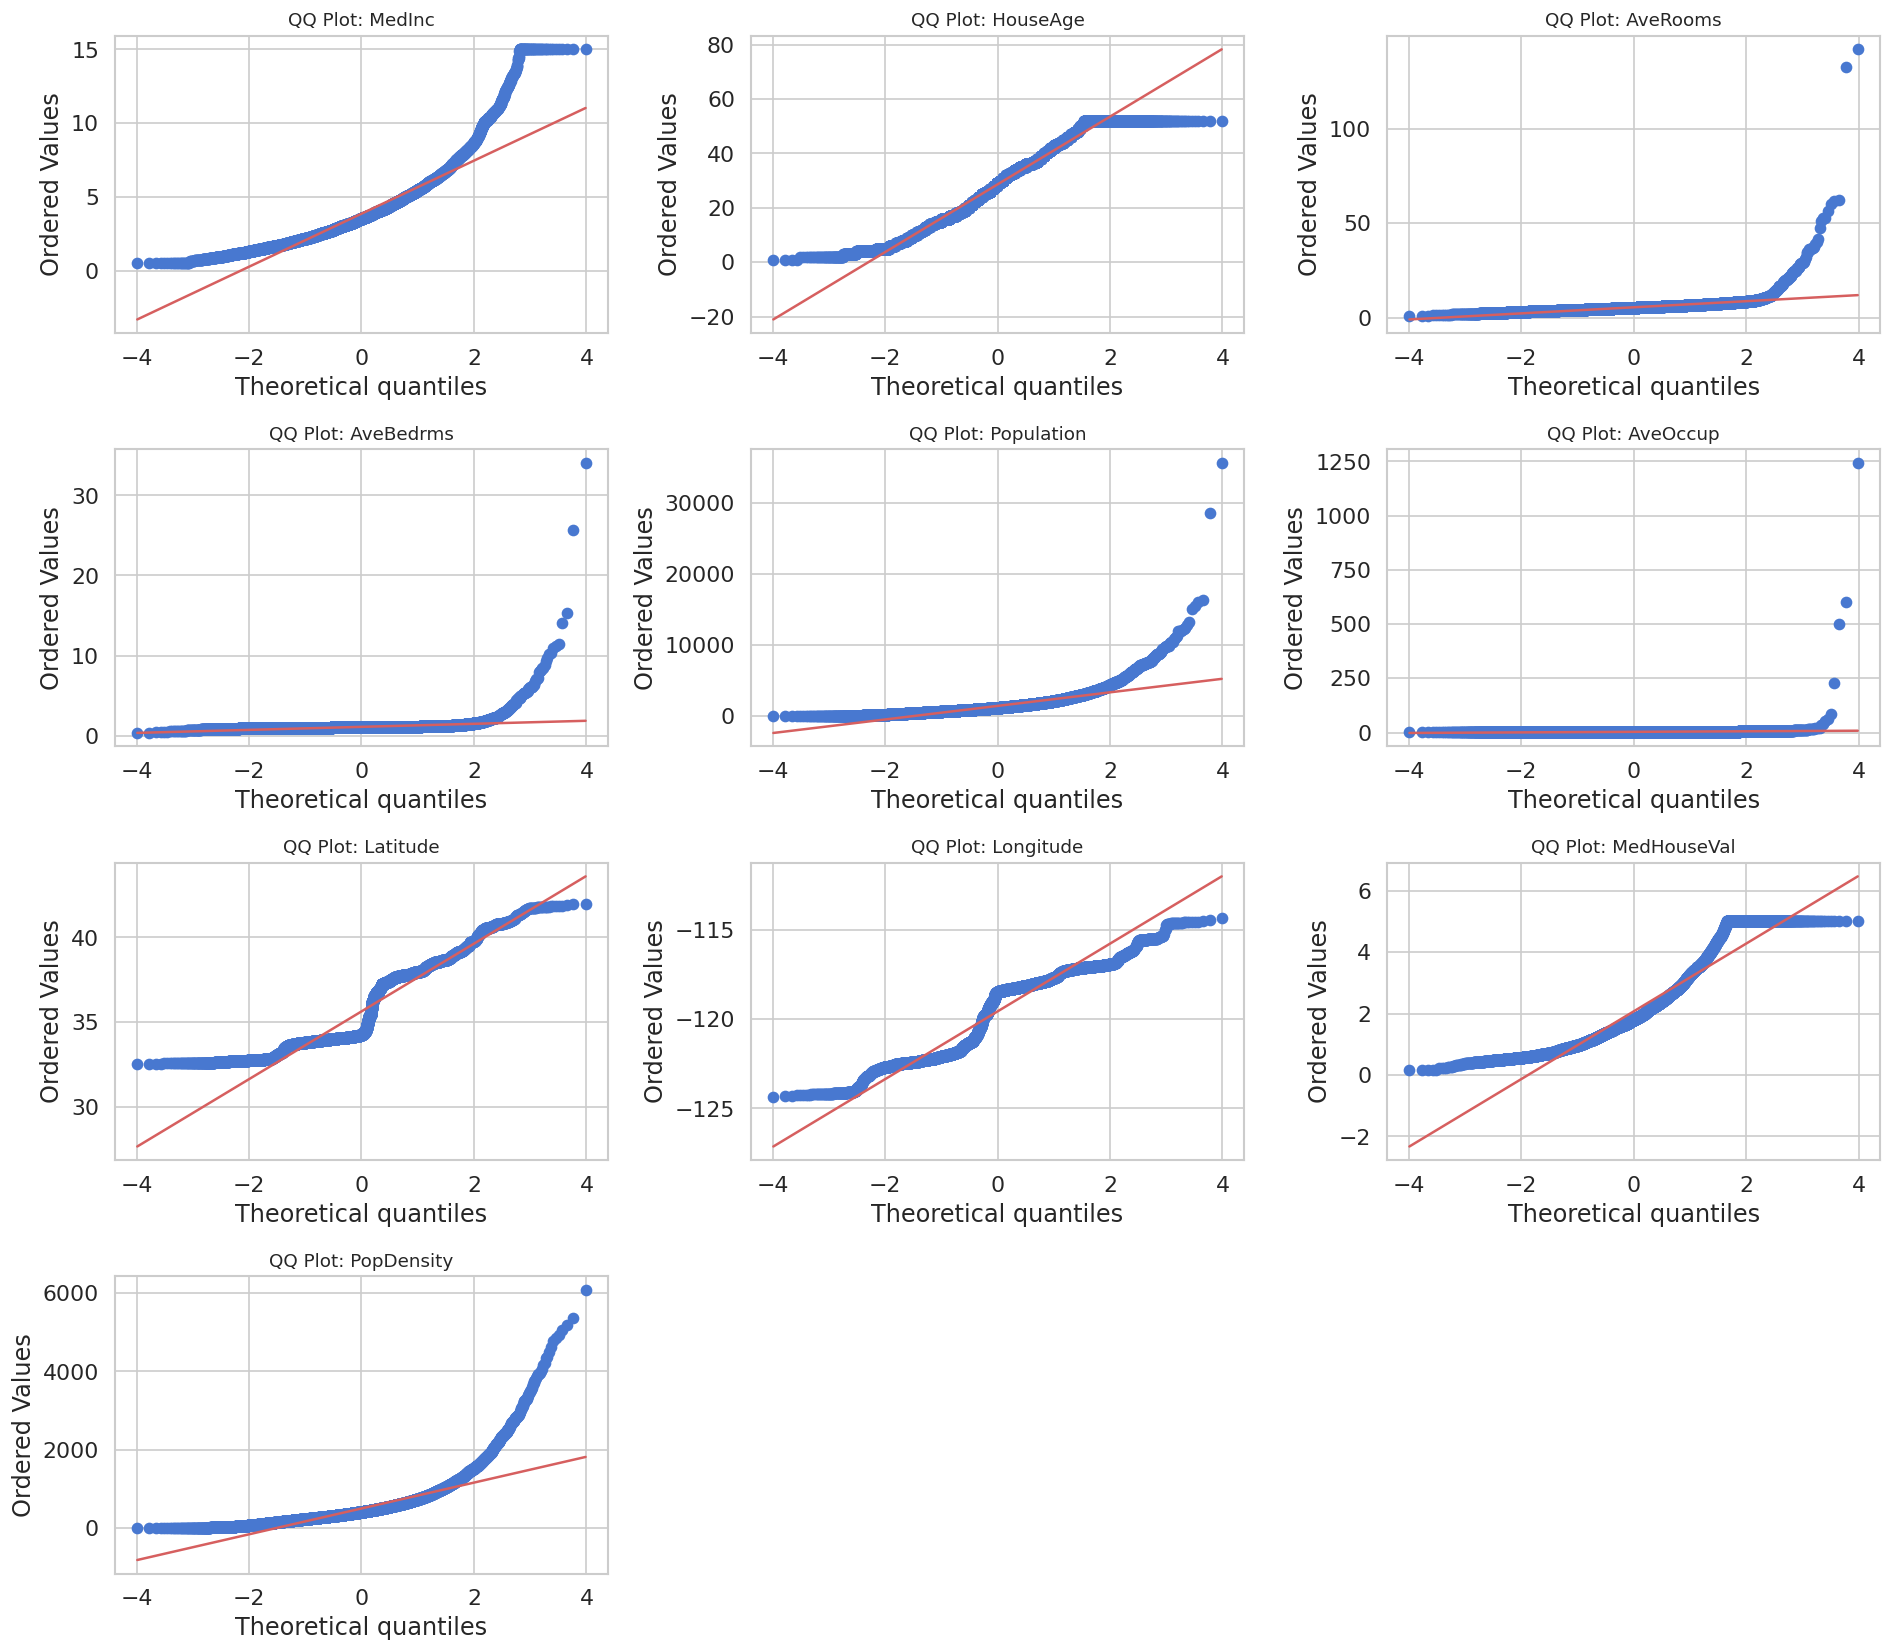

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# === Setup ===
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.dpi'] = 120

OUTPUT_DIR = "eda_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

numeric_cols = df.select_dtypes(include='number').columns

# === Distribution + KDE Combined Grid ===
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution + KDE: {col}', fontsize=11)
    axes[i].set_xlabel(col)

# Remove extra subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
dist_plot_path = os.path.join(OUTPUT_DIR, "all_distributions_kde.png")
plt.savefig(dist_plot_path)
mlflow.log_artifact(dist_plot_path, artifact_path="combined_plots")
plt.show()

# === Box Plots Grid ===
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot: {col}', fontsize=11)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
box_plot_path = os.path.join(OUTPUT_DIR, "all_boxplots.png")
plt.savefig(box_plot_path)
mlflow.log_artifact(box_plot_path, artifact_path="combined_plots")
plt.show()

# === QQ Plots Grid ===
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'QQ Plot: {col}', fontsize=11)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
qq_plot_path = os.path.join(OUTPUT_DIR, "all_qqplots.png")
plt.savefig(qq_plot_path)
mlflow.log_artifact(qq_plot_path, artifact_path="combined_plots")
plt.show()

# === Log tags ===
mlflow.set_tag("stage", "Advanced EDA")
mlflow.set_tag("eda_type", "combined_plots")
mlflow.set_tag("visuals", "hist+kde, box, qq")

In [20]:
mlflow.end_run()

🏃 View run EDA at: http://135.235.186.123/#/experiments/4/runs/a5ba3500636a43109669d192f2774c9f
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [21]:
mlflow.set_experiment("CaliforniaHousing")
mlflow.start_run(run_name="Preprocessing")

<ActiveRun: >

In [22]:
from sklearn.model_selection import train_test_split

X = df.copy()
X.drop(columns=["MedHouseVal"], inplace=True)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlflow.log_param("train_rows", X_train.shape[0])
mlflow.log_param("test_rows", X_test.shape[0])
mlflow.log_param("test_split", 0.2)

0.2

In [23]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlflow.log_param("scaler", "StandardScaler")

'StandardScaler'

In [24]:
import joblib

# Save scaled arrays & y
np.save(os.path.join(OUTPUT_DIR, "X_train_scaled.npy"), X_train_scaled)
np.save(os.path.join(OUTPUT_DIR, "X_test_scaled.npy"), X_test_scaled)
np.save(os.path.join(OUTPUT_DIR, "y_train.npy"), y_train)
np.save(os.path.join(OUTPUT_DIR, "y_test.npy"), y_test)

# Save scaler for inference
joblib.dump(scaler, os.path.join(OUTPUT_DIR, "scaler.pkl"))

# Log artifacts
mlflow.log_artifact(os.path.join(OUTPUT_DIR, "X_train_scaled.npy"), artifact_path="data_prepared")
mlflow.log_artifact(os.path.join(OUTPUT_DIR, "X_test_scaled.npy"), artifact_path="data_prepared")
mlflow.log_artifact(os.path.join(OUTPUT_DIR, "y_train.npy"), artifact_path="data_prepared")
mlflow.log_artifact(os.path.join(OUTPUT_DIR, "y_test.npy"), artifact_path="data_prepared")
mlflow.log_artifact(os.path.join(OUTPUT_DIR, "scaler.pkl"), artifact_path="data_prepared")

In [25]:
import pandas as pd
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# Use a small example (e.g., first 5 rows)
input_example = pd.DataFrame(X_train[:5], columns=X_train.columns)
signature = infer_signature(X_train, X_train_scaled)

mlflow.sklearn.log_model(
    scaler,
    artifact_path="scaler_model_v2",
    input_example=input_example,
    signature=signature
)

2025/04/14 20:26:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/04/14 20:26:55 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "MedInc",
      "HouseAge",
      "AveRooms",
      "AveBedrms",
      "Population",
      "AveOccup",
      "Latitude",
      "Longitude",
      "PopDensity"
    ],
    "data": [
      [
        3.2596,
        33.0,
        5.017656500802568,
        1.0064205457463884,
        2300.0,
        3.691813804173355,
        32.71,
        -117.03,
        623.0
      ],
      [
        3.8125,
        49.0,
        4.473544973544974,
        1.041005291005291,
        1314.0,
        1.7380952380952381,
        33.77,
        -118.16,
        756.0
      ],
      [
        4.1563,
        4.0,
        5.645833333333333,
        0.9851190476190477,
        915.0,
        2.7232142857142856,
        34.66,
        -120.48,
        336.0
  

In [26]:
mlflow.end_run()

🏃 View run Preprocessing at: http://135.235.186.123/#/experiments/4/runs/094a4666ad9c449fa51355917cdb237b
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow.sklearn
import numpy as np

def evaluate_and_log(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Log metrics
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2_Score", r2)

    print(f"📊 {model_name} Evaluation:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

In [28]:
X_train_scaled.shape

(16512, 9)

In [29]:
from sklearn.linear_model import LinearRegression

mlflow.set_experiment("CaliforniaHousing")
with mlflow.start_run(run_name="LinearRegression", tags={"mlflow.system_metrics_enabled": "true"}):
    model = LinearRegression()
    mlflow.log_param("fit_intercept", model.fit_intercept)

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    evaluate_and_log("Linear Regression", y_test, preds)

    input_example = pd.DataFrame(X_train_scaled[:5], columns=X_train.columns)
    signature = infer_signature(X_train_scaled, model.predict(X_train_scaled))

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

📊 Linear Regression Evaluation:
MAE: 0.5111
MSE: 0.5055
RMSE: 0.7110
R²: 0.6143
🏃 View run LinearRegression at: http://135.235.186.123/#/experiments/4/runs/2b65cac878fc4cfaaf8504abe8a845f5
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [30]:
from sklearn.ensemble import RandomForestRegressor

mlflow.set_experiment("CaliforniaHousing")
with mlflow.start_run(run_name="RandomForestRegressor"):
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

    # Log hyperparameters
    mlflow.log_params({
        "n_estimators": 100,
        "max_depth": 10,
        "random_state": 42
    })

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    evaluate_and_log("Random Forest Regressor", y_test, preds)

    input_example = pd.DataFrame(X_train_scaled[:5], columns=X_train.columns)
    signature = infer_signature(X_train_scaled, model.predict(X_train_scaled))

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

📊 Random Forest Regressor Evaluation:
MAE: 0.3672
MSE: 0.2968
RMSE: 0.5448
R²: 0.7735
🏃 View run RandomForestRegressor at: http://135.235.186.123/#/experiments/4/runs/6260816ddcdc4b68b5b35c864f524b1e
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [31]:
from sklearn.svm import SVR

mlflow.set_experiment("CaliforniaHousing")
with mlflow.start_run(run_name="Support Vector Regressor"):
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

    # Log hyperparameters
    mlflow.log_params({
        "kernel": 'rbf',
        "C": 1.0,
        "epsilon": 0.1,
        "random_state": 42
    })

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    evaluate_and_log("Support Vector Regressor ", y_test, preds)

    input_example = pd.DataFrame(X_train_scaled[:5], columns=X_train.columns)
    signature = infer_signature(X_train_scaled, model.predict(X_train_scaled))

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

📊 Support Vector Regressor  Evaluation:
MAE: 0.3847
MSE: 0.3302
RMSE: 0.5746
R²: 0.7480
🏃 View run Support Vector Regressor at: http://135.235.186.123/#/experiments/4/runs/e70ab9e57faa4106955180c4faac110f
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [32]:
from sklearn.ensemble import GradientBoostingRegressor


mlflow.set_experiment("CaliforniaHousing")
with mlflow.start_run(run_name="GradientBoostingRegressor"):
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

    # Log hyperparameters
    mlflow.log_params({
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3
    })

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    evaluate_and_log("GradientBoostingRegressor ", y_test, preds)

    input_example = pd.DataFrame(X_train_scaled[:5], columns=X_train.columns)
    signature = infer_signature(X_train_scaled, model.predict(X_train_scaled))

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

📊 GradientBoostingRegressor  Evaluation:
MAE: 0.3722
MSE: 0.2953
RMSE: 0.5434
R²: 0.7747
🏃 View run GradientBoostingRegressor at: http://135.235.186.123/#/experiments/4/runs/d3b37af5b7164032b14673311bccd4ad
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [33]:
from sklearn.neighbors import KNeighborsRegressor


mlflow.set_experiment("CaliforniaHousing")
with mlflow.start_run(run_name="KNeighborsRegressor"):
    model = KNeighborsRegressor(n_neighbors=5)

    # Log hyperparameters
    mlflow.log_params({
        "n_neighbors": 5
    })

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    evaluate_and_log("KNeighborsRegressor ", y_test, preds)

    input_example = pd.DataFrame(X_train_scaled[:5], columns=X_train.columns)
    signature = infer_signature(X_train_scaled, model.predict(X_train_scaled))

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

📊 KNeighborsRegressor  Evaluation:
MAE: 0.4187
MSE: 0.3925
RMSE: 0.6265
R²: 0.7005
🏃 View run KNeighborsRegressor at: http://135.235.186.123/#/experiments/4/runs/747bb777899442c19911f1ed930bc486
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [34]:
from sklearn.linear_model import Ridge


mlflow.set_experiment("CaliforniaHousing")
with mlflow.start_run(run_name="Ridge"):
    model = Ridge(alpha=1.0)

    # Log hyperparameters
    mlflow.log_params({
        "alpha": 1.0
    })

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    evaluate_and_log("Ridge ", y_test, preds)

    input_example = pd.DataFrame(X_train_scaled[:5], columns=X_train.columns)
    signature = infer_signature(X_train_scaled, model.predict(X_train_scaled))

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

📊 Ridge  Evaluation:
MAE: 0.5111
MSE: 0.5054
RMSE: 0.7109
R²: 0.6143
🏃 View run Ridge at: http://135.235.186.123/#/experiments/4/runs/6c7f52f845a846f99655f0b2c75b1dfe
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [35]:
from sklearn.linear_model import Lasso


mlflow.set_experiment("CaliforniaHousing")
with mlflow.start_run(run_name="Lasso"):
    model = Lasso(alpha=0.01)

    # Log hyperparameters
    mlflow.log_params({
        "alpha": 0.01
    })

    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    evaluate_and_log("Lasso ", y_test, preds)

    input_example = pd.DataFrame(X_train_scaled[:5], columns=X_train.columns)
    signature = infer_signature(X_train_scaled, model.predict(X_train_scaled))

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

📊 Lasso  Evaluation:
MAE: 0.5143
MSE: 0.5018
RMSE: 0.7084
R²: 0.6171
🏃 View run Lasso at: http://135.235.186.123/#/experiments/4/runs/9af004cad28549bda637fe3d8430400e
🧪 View experiment at: http://135.235.186.123/#/experiments/4


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import mlflow.tensorflow

mlflow.set_experiment("CaliforniaHousing")
with mlflow.start_run(run_name="KerasDNNRegressor"):
    input_dim = X_train_scaled.shape[1]

    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    mlflow.log_params({
        "optimizer": "adam",
        "loss": "mse",
        "epochs": 20,
        "batch_size": 32
    })

    history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.1)

    preds = model.predict(X_test_scaled).flatten()
    evaluate_and_log("Keras DNN", y_test, preds)

    input_example = X_train_scaled[:5]
    signature = infer_signature(input_example, model.predict(input_example))

    mlflow.tensorflow.log_model(
        model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

2025-04-14 20:28:50.633631: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 20:28:50.634770: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 20:28:50.640295: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 20:28:50.649285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744642730.664607  984968 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744642730.66

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
📊 Keras DNN Evaluation:
MAE: 0.3668
MSE: 0.2942
RMSE: 0.5424
R²: 0.7755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
🏃 View run KerasDNNRegressor at: http://135.235.186.123/#/experiments/4/runs/e6d3a187a7cc4cae8c117e2eed3beff8
🧪 View experiment at: http://135.235.186.123/#/experiments/4


# Hyperparameter Tuning

In [37]:
import numpy as np
import mlflow
from sklearn.model_selection import GridSearchCV

mlflow.set_experiment("CaliforniaHousing - Hyperparameter Tuning")

<Experiment: artifact_location='wasbs://artifactroot@tharindumlflow3be9ca4d.blob.core.windows.net/5', creation_time=1744636117966, experiment_id='5', last_update_time=1744636117966, lifecycle_stage='active', name='CaliforniaHousing - Hyperparameter Tuning', tags={}>

In [38]:

def tune_and_log_model(model_name, model_class, param_grid):
    print(f"🔍 Tuning {model_name}...")

    # Create grid search
    grid_search = GridSearchCV(
        estimator=model_class,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
        verbose=3,
        return_train_score=True
    )

    # Start a new MLflow run
    with mlflow.start_run(run_name=model_name):
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Predictions
        preds = best_model.predict(X_test_scaled)

        # Log best hyperparameters
        mlflow.log_params(best_params)

        # Evaluate and log metrics
        evaluate_and_log(model_name, y_test, preds)

        # Log the model with signature
        from mlflow.models.signature import infer_signature
        input_example = pd.DataFrame(X_train_scaled[:5], columns=X_train.columns)
        signature = infer_signature(X_train_scaled, best_model.predict(X_train_scaled))
        mlflow.sklearn.log_model(best_model, "model", signature=signature, input_example=input_example)

        print(f"✅ Best params for {model_name}: {best_params}")

In [39]:
tune_and_log_model(
    model_name="Ridge",
    model_class=Ridge(),
    param_grid={
        "alpha": [0.01, 0.1, 1.0, 10.0],
        "solver": ["auto", "sag", "cholesky"]  # Changed problematic solver
        # Alternatively, add "positive": [True] if you want to use 'lbfgs'
    }
)

🔍 Tuning Ridge...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END alpha=0.01, solver=auto;, score=(train=-0.476, test=-0.477) total time=   0.0s
[CV 4/5] END alpha=0.01, solver=cholesky;, score=(train=-0.479, test=-0.462) total time=   0.0s
[CV 2/5] END alpha=0.01, solver=auto;, score=(train=-0.479, test=-0.461) total time=   0.1s
[CV 5/5] END alpha=0.1, solver=auto;, score=(train=-0.464, test=-0.527) total time=   0.0s
[CV 1/5] END alpha=0.1, solver=auto;, score=(train=-0.476, test=-0.477) total time=   0.0s
[CV 3/5] END alpha=0.01, solver=auto;, score=(train=-0.478, test=-0.470) total time=   0.0s
[CV 1/5] END alpha=0.1, solver=cholesky;, score=(train=-0.476, test=-0.477) total time=   0.0s
[CV 2/5] END alpha=0.1, solver=cholesky;, score=(train=-0.479, test=-0.461) total time=   0.0s
[CV 4/5] END alpha=0.01, solver=sag;, score=(train=-0.479, test=-0.462) total time=   0.5s[CV 3/5] END alpha=0.1, solver=cholesky;, score=(train=-0.478, test=-0.470) total time=

In [40]:
from sklearn.svm import SVR

tune_and_log_model(
    model_name="SVR",
    model_class=SVR(),
    param_grid={
        "C": [0.1, 1.0, 10.0],
        "kernel": ["linear", "rbf"],
        "epsilon": [0.01, 0.1, 0.2]
    }
)

🔍 Tuning SVR...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 2/5] END C=0.1, epsilon=0.2, kernel=linear;, score=(train=-0.494, test=-0.474) total time=  21.8s
[CV 1/5] END C=0.1, epsilon=0.2, kernel=linear;, score=(train=-0.490, test=-0.492) total time=  24.3s
[CV 1/5] END C=0.1, epsilon=0.1, kernel=linear;, score=(train=-0.492, test=-0.495) total time=  23.6s
[CV 2/5] END C=0.1, epsilon=0.01, kernel=linear;, score=(train=-0.497, test=-0.477) total time=  25.7s
[CV 4/5] END C=0.1, epsilon=0.1, kernel=linear;, score=(train=-0.496, test=-0.476) total time=  26.8s
[CV 5/5] END C=0.1, epsilon=0.1, kernel=linear;, score=(train=-0.480, test=-0.538) total time=  30.4s
[CV 5/5] END C=0.1, epsilon=0.01, kernel=linear;, score=(train=-0.480, test=-0.540) total time=  29.4s
[CV 2/5] END C=0.1, epsilon=0.1, kernel=linear;, score=(train=-0.496, test=-0.476) total time=  30.8s
[CV 3/5] END C=0.1, epsilon=0.01, kernel=linear;, score=(train=-0.496, test=-0.484) total time=  27.6s
[C

In [48]:
from sklearn.ensemble import RandomForestRegressor

tune_and_log_model(
    model_name="RandomForest_Extended",
    model_class=RandomForestRegressor(random_state=42),
    param_grid={
        "n_estimators": [100, 200, 300],  # Add higher values
        "max_depth": [None, 15, 20],  # Keep None and try larger depths
        "min_samples_split": [2, 4, 8],  # More granular values
        "min_samples_leaf": [1, 2, 4],  # Add this parameter
        "max_features": ["sqrt", "log2", None]  # Add feature selection parameter
    }
)

🔍 Tuning RandomForest_Extended...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=-0.048, test=-0.252) total time=   5.9s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.036, test=-0.253) total time=   6.0s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.035, test=-0.250) total time=   6.0s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.035, test=-0.245) total time=   6.0s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=-0.047, test=-0.253) total time=   6.5s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estima

/home/tharindu/repos/mlflow_iris_example/.venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=-0.047, test=-0.248) total time=  21.7s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=-0.034, test=-0.250) total time=  30.8s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=-0.034, test=-0.249) total time=  30.9s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-0.065, test=-0.255) total time=   7.9s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=(train=-0.074, test=-0.252) total time=  17.0s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=-0.066, test=-0.257) total time=   9.2s
[CV 1/5] END max_depth=None, max_f

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

tune_and_log_model(
    model_name="GradientBoosting-v2",
    model_class=GradientBoostingRegressor(random_state=42),
    param_grid={
        "n_estimators": [100, 150, 200, 250],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5, 8, 10]
    }
)

🔍 Tuning GradientBoosting-v2...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=(train=-0.305, test=-0.333) total time=   3.4s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=(train=-0.306, test=-0.330) total time=   3.3s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=(train=-0.306, test=-0.322) total time=   3.4s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=(train=-0.307, test=-0.342) total time=   3.4s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=(train=-0.312, test=-0.312) total time=   3.5s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=150;, score=(train=-0.275, test=-0.306) total time=   5.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=150;, score=(train=-0.278, test=-0.287) total time=   5.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=150;, score=(train=-0

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

tune_and_log_model(
    model_name="GradientBoosting-v3",
    model_class=GradientBoostingRegressor(random_state=42),
    param_grid={
        "n_estimators": [250, 350, 500],
        "learning_rate": [0.08, 0.1, 0.15],
        "max_depth": [8, 10, 12],
        "min_samples_split": [2, 5],
        "subsample": [0.8, 1.0]
    }
)

🔍 Tuning GradientBoosting-v3...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 5/5] END learning_rate=0.08, max_depth=8, min_samples_split=2, n_estimators=250, subsample=0.8;, score=(train=-0.023, test=-0.217) total time=  36.8s
[CV 3/5] END learning_rate=0.08, max_depth=8, min_samples_split=2, n_estimators=250, subsample=0.8;, score=(train=-0.024, test=-0.213) total time=  40.1s
[CV 3/5] END learning_rate=0.08, max_depth=8, min_samples_split=2, n_estimators=250, subsample=1.0;, score=(train=-0.025, test=-0.217) total time=  44.5s
[CV 1/5] END learning_rate=0.08, max_depth=8, min_samples_split=2, n_estimators=250, subsample=1.0;, score=(train=-0.026, test=-0.216) total time=  44.9s
[CV 5/5] END learning_rate=0.08, max_depth=8, min_samples_split=2, n_estimators=250, subsample=1.0;, score=(train=-0.027, test=-0.224) total time=  49.7s
[CV 3/5] END learning_rate=0.08, max_depth=8, min_samples_split=2, n_estimators=350, subsample=0.8;, score=(train=-0.014, test=-0.213) 

In [ ]:
from sklearn.linear_model import LinearRegression

tune_and_log_model(
    model_name="LinearRegression",
    model_class=LinearRegression(),
    param_grid={
        "fit_intercept": [True, False],
        "copy_X": [True, False],
        "positive": [False, True]  # Constrains coefficients to be positive
    }
)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

tune_and_log_model(
    model_name="KNN",
    model_class=KNeighborsRegressor(),
    param_grid={
        "n_neighbors": [3, 5, 7, 9, 11, 15],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "p": [1, 2]  # 1 for Manhattan distance, 2 for Euclidean
    }
)

In [ ]:
from sklearn.linear_model import Lasso

tune_and_log_model(
    model_name="Lasso",
    model_class=Lasso(random_state=42, max_iter=5000),
    param_grid={
        "alpha": [0.001, 0.01, 0.1, 0.5, 1.0, 10.0],
        "fit_intercept": [True, False],
        "selection": ["cyclic", "random"],
        "tol": [1e-3, 1e-4]
    }
)